<a href="https://colab.research.google.com/github/nakalyangomolly/ML-models/blob/main/Co2_level_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Reading our data
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/FuelConsumption.csv",encoding='cp1252')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,304,2.0,4,1,2,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,898,2.4,4,1,2,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,589,1.5,4,1,2,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,478,3.5,6,1,2,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,649,3.5,6,1,2,12.1,8.7,10.6,27,244


In [5]:
#Creating a dataframe with some features
newdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
newdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


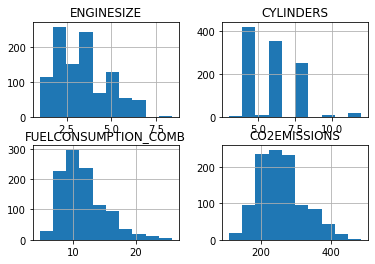

In [6]:
#Plotting a scatter of the selected features
newdf.hist()
plt.show()

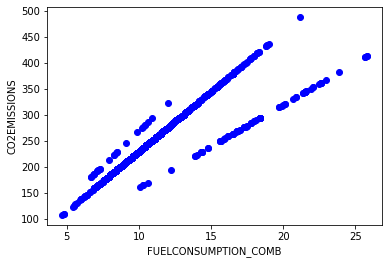

In [7]:
#Exploring linearity between co2 emissions and other dependant features
#1.Scatter graph of fuel consumptions and co2 emissions
plt.scatter(newdf.FUELCONSUMPTION_COMB , newdf.CO2EMISSIONS , color ='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CO2EMISSIONS")
plt.show()

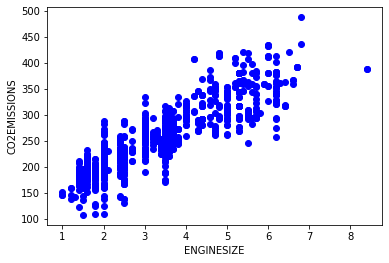

In [8]:
#2.Scatter graph of enginee size and co2 emissions
plt.scatter(newdf.ENGINESIZE, newdf.CO2EMISSIONS, color="blue")
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

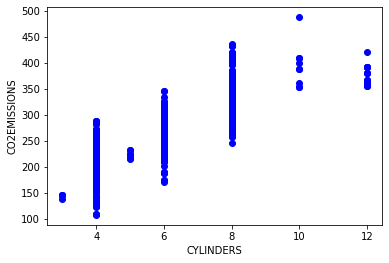

In [9]:
#3.Scatter graph of cylinders and co2 emissions
plt.scatter(newdf.CYLINDERS, newdf.CO2EMISSIONS, color="blue")
plt.xlabel("CYLINDERS")
plt.ylabel("CO2EMISSIONS")
plt.show()

In [11]:
#Split our data into the train dataset(80%) and test dataset(20%) using a mask to select the radom  values
mask = np.random.rand(len(df)) <0.8
test = newdf[mask]
train = newdf[mask]

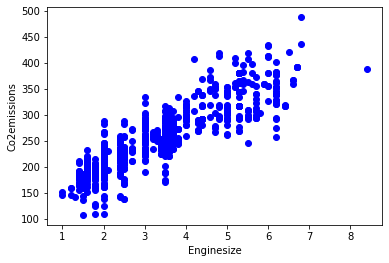

In [12]:
#Distribution of our train data
plt.scatter(train.ENGINESIZE , train.CO2EMISSIONS , color ="blue")
plt.xlabel("Enginesize")
plt.ylabel("Co2emissions")
plt.show()

In [14]:
#Modeling our data using the sklearn
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[["ENGINESIZE"]])
train_y = np.asanyarray(train[["CO2EMISSIONS"]])
regr.fit(train_x , train_y)
#Finding our coefficients
print("Coffiecients: " ,regr.coef_)
print("Intercepts: ",regr.intercept_)


Coffiecients:  [[38.55540012]]
Intercepts:  [127.16044614]


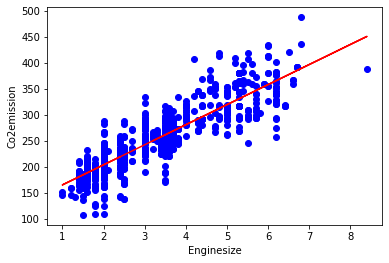

In [17]:
#Plotting the line of best fit
plt.scatter(train.ENGINESIZE , train.CO2EMISSIONS, color ="blue")
plt.plot(train_x , regr.coef_*train_x + regr.intercept_ , color ="red")
plt.xlabel("Enginesize")
plt.ylabel("Co2emission")
plt.show()

In [28]:
#Calculating performance of our model 
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[["CO2EMISSIONS"]])
test_y_ = regr.predict(test_x)

print("MSE: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of errors(MSE): %.2f" % np.mean((test_y_ - test_y) **2))
print("R2-score: %.2f" % r2_score(test_y , test_y_))


MSE: 22.98
Residual sum of errors(MSE): 914.03
R2-score: 0.76


In [29]:
#Finding the MSE usinfg the Fuel consunption
train_x = train[["FUELCONSUMPTION_COMB"]]
test_x = test[["FUELCONSUMPTION_COMB"]]


In [30]:
regr =linear_model.LinearRegression()

regr.fit(train_x , train_y)


LinearRegression()

In [31]:
predictions = regr.predict(test_x)

In [34]:
print("MSE: %.2f" % np.mean(np.absolute(predictions -test_y)))

MSE: 20.58


In [ ]:
#We can see that the MAE is much worse when we train using ENGINESIZE than FUELCONSUMPTION_COMB